#### Linear data classification using SVM

(400, 2) (400,)


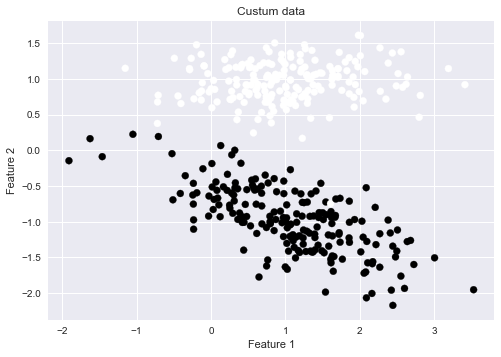

In [13]:
### Data preparation
from sklearn.datasets import make_classification

X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)
print(X.shape,Y.shape)

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y)
plt.title("Custum data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
### Stastical data analysis
print("The mean is {}".format(X.mean()))
print("The std is {} \n\n\n".format(X.std()))

XProcessed = (X - X.mean())/X.std()

print("The mean after preprocessing is {}".format(XProcessed.mean()))
print("The std after preprocessing is {}".format(XProcessed.std()))

Y[Y==0] = -1

The mean is 0.5078965246306784
The std is 1.0724848390050565 



The mean after preprocessing is 1.5543122344752193e-17
The std after preprocessing is 1.0


In [26]:
## Data model
import numpy as np

class SVM:
    """SVM Class, Author : Prateek Narang"""
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule that we discussed!
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses
    
    def lossAnalysis(self,errorList):
        plt.plot(errorList)
        plt.xlabel("Iterations")
        plt.ylabel("Error value")
        plt.show()
    def plotHyperplane(self,w1,w2,b):
        plt.figure(figsize=(12,12))
        x_1 = np.linspace(-2,4,10)
        x_2 = -(w1*x_1+b)/w2 # WT + B = 0

        x_p = -(w1*x_1+b+1)/w2 # WT + B = -1
        x_n = -(w1*x_1+b-1)/w2 # WT + B = +1


        plt.plot(x_1,x_2,label="Hyperplane WX+B=0")
        plt.plot(x_1,x_p,label="+ve Hyperplane WX+B=1")
        plt.plot(x_1,x_n,label="-ve Hyperplane WX+B=-1")
        plt.legend()
        plt.scatter(X[:,0],X[:,1],c=Y)
        plt.show()

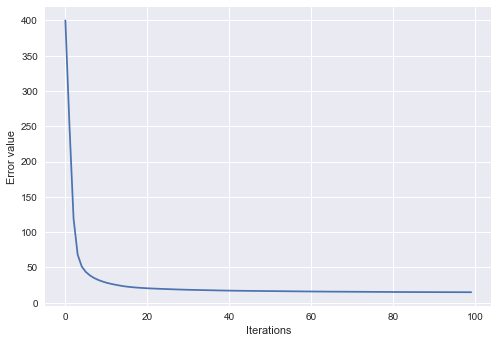

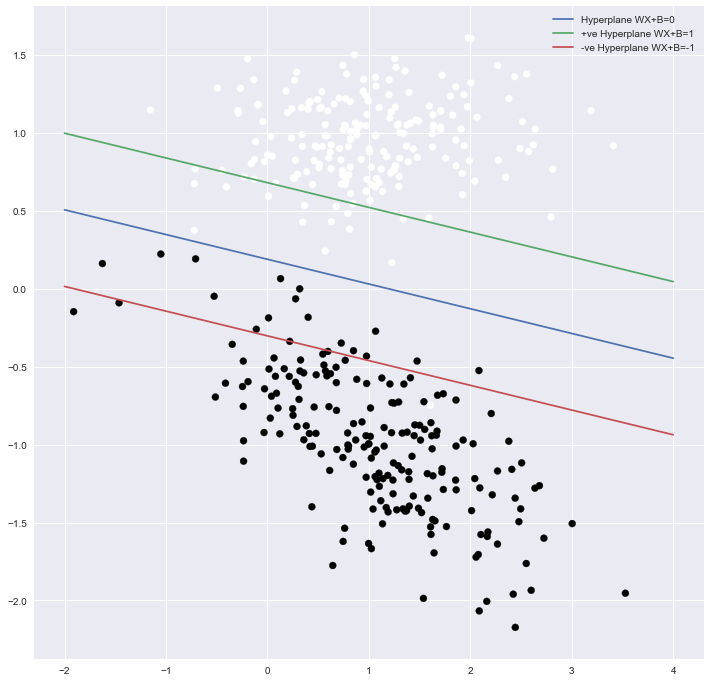

In [27]:
mySVM = SVM(C=1)
W,b,losses = mySVM.fit(X,Y,maxItr=100)
mySVM.lossAnalysis(losses)
mySVM.plotHyperplane(W[0,0],W[0,1],b)